In [1]:
import cv2                          # use for computer vision
import matplotlib.pyplot as plt     # use for plot and visualization
from ultralytics import YOLO        # use for classication and segmentation
from PIL import Image               # use for image
import os                           # use for modification folder
import shutil                       # use for moving file operations
import numpy as np                  # use for array


Loading Detection Model...
File yolo12n.pt not found in directory Yolo Model. Downloading...
Model successfully moved to Yolo Model\yolo12n.pt.
Model yolo12n.pt successfully loaded.
Original image successfully loaded from: Test Image\Sample.jpg


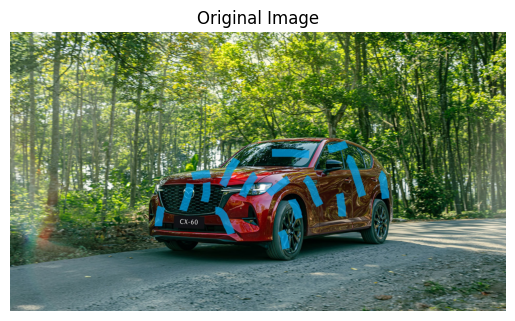

In [2]:
def load_or_download_yolo_model(model_name):
    """
    Load YOLO model from local directory if available.
    If not, download it, move it to the specified directory, and then load it.
    """
    # 1. Specify the directory where the model will be saved
    model_dir = r'Yolo Model'
    local_path = os.path.join(model_dir, model_name)

    # 2. Check if the model file already exists in the target folder
    if os.path.exists(local_path):
        print(f"Loading {model_name} model from {local_path}...")
        model = YOLO(local_path)
        print(f"{model_name} model successfully loaded from {local_path}")
    else:
        print(f"File {model_name} not found in directory {model_dir}. Downloading...")
        
        try:
            # Initialize YOLO to trigger the auto-download.
            # By default, this downloads the file to the current working directory (root).
            temp_model = YOLO(model_name)
            
            # Create the target directory if it does not exist
            os.makedirs(model_dir, exist_ok=True)
            
            # 3. Move the downloaded file from root to the target directory
            # The file is currently in the root folder with the name 'model_name'
            if os.path.exists(model_name):
                shutil.move(model_name, local_path)
                print(f"Model successfully moved to {local_path}.")
            
            # 4. Reload the model from the correct local path to ensure consistency
            model = YOLO(local_path)
            print(f"Model {model_name} successfully loaded.")
            
        except Exception as e:
            print(f"ERROR: Failed to download or organize model {model_name}. Please ensure a stable internet connection.")
            raise e
    
    return model

# --- Main Execution ---

# Load YOLO Detection Model
print("\nLoading Detection Model...")
model = load_or_download_yolo_model('yolo12n.pt')

# 2. Define test image file path
image_path = r"Test Image\Sample.jpg"
            
# 4. Read image using OpenCV
original_image = cv2.imread(image_path)

# 5. Display original image (convert BGR to RGB for matplotlib)
if original_image is None:
    print(f"ERROR: Failed to load image from path: {image_path}")
    print("Ensure the path is correct, the file is not corrupt, and read permissions are granted.")
else:
    # Display the image if loaded successfully
    print(f"Original image successfully loaded from: {image_path}")
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()


image 1/1 d:\Marinternet\hvac-pipe-measure\training\Test Image\Sample.jpg: 384x640 1 car, 83.5ms
Speed: 2.8ms preprocess, 83.5ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
Detection has done. the model finds the following objects:


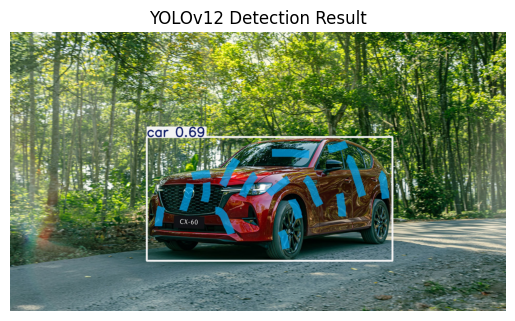

In [3]:
results = model(image_path)

#showing image with bounding box for verification
print("Detection has done. the model finds the following objects:")
annotated_image = results[0].plot() # return image (array numpy) with annotation
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.title("YOLOv12 Detection Result")
plt.axis('off')
plt.show()